In [ ]:
## Skip-gram model

In [136]:
import numpy as np
import tensorflow as tf

In [4]:
corpus_raw = 'He is the king . The king is royal . she is the royal queen '

In [6]:
# Convert to lower case 
corpus_raw = corpus_raw.lower()
print corpus_raw 

he is the king . the king is royal . she is the royal queen 


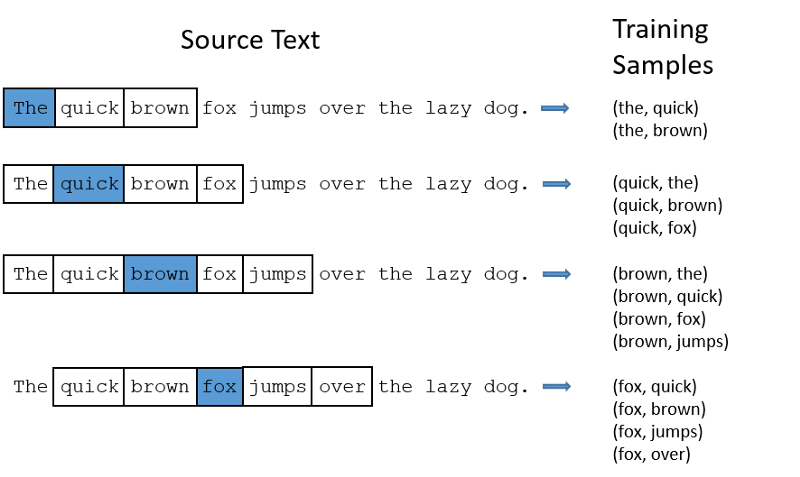

In [163]:
# Here’s a handy example from this amazing post on word2vec by Chris McCormick.
from IPython.display import Image
Image(filename='/home/asabir/Desktop/exp-w2v.png')

In [21]:
words = []
#becuase we dont want to treat . as word 
for word in corpus_raw.split():
    if word != '.':
        words.append(word)

In [23]:
# remove all duplicate word 
words = set (words)
print words

set(['king', 'she', 'is', 'queen', 'royal', 'the', 'he'])


In [28]:
word2int = {}
int2word = {}
# Give the total number of unique words 
vocab_size = len(words)
print('give the total number of unique words')
print vocab_size 
### 
for i, word in enumerate(words):
    word2int[word] = i 
    int2word[i] = word

give the total number of unique words
7


In [29]:
# The dictionaries allow us to do : 
print (word2int['queen'])

3


In [32]:
print (int2word[3])

queen


In [34]:
# we want a list if our sentences as a list of words:
# raw_sentencce is a list of sentences
raw_sentences = corpus_raw.split('.')
sentences = [] 
for sentence in raw_sentences:
    sentences.append(sentence.split())
# to give us a list of sentences where each senteance is a list of words. 
print (sentences)    

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


In [41]:
# Now we genterate our traning data 

data = [] 

WINDOW_SIZE = 2 

for sentence in sentences: 
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[(max(word_index - WINDOW_SIZE, 0)): min(word_index + WINDOW_SIZE, len(sentence)+1)] :
                             if nb_word != word: 
                                   data.append([word, nb_word])

In [42]:
print (data)

[['he', 'is'], ['is', 'he'], ['is', 'the'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['king', 'the'], ['king', 'is'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['is', 'she'], ['is', 'the'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]


In [44]:
# now we need to represented the data in ONE-hot-encoder 
# for example 
# for example you have 3 words : tokyo, texas , barcelona
#word2int = ['tokyo'] --> 0 --> [1 0 0]
#word2int = ['barcelona'] --> 1 --> [0 1 0]
#word2int = ['texas '] --> 2 --> [0 0 1]


In [45]:
# Hot encoder vector 
# function to convert number to one hot vertors 
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index]= 1 
    return temp 

In [46]:
# input word 
x_train = [] 
# output word
y_train = []
# 
for data_word in data: 
    x_train.append(to_one_hot(word2int[data_word[0]], vocab_size))
    y_train.append(to_one_hot(word2int[data_word[1]], vocab_size))
    

In [48]:
# convert them to numpy arrays 
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [49]:
print(x_train)

[[ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]]


In [50]:
print(y_train)

[[ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]]


In [52]:
print(x_train.shape, y_train.shape)
### meaning 27 tranining point where each point has 7 dimensions 

((27, 7), (27, 7))


In [55]:
#### Tensorflow program start Here 
### creating the placeholder  x_train, and y_train 
x = tf.placeholder(tf.float32, shape =(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape =(None, vocab_size))

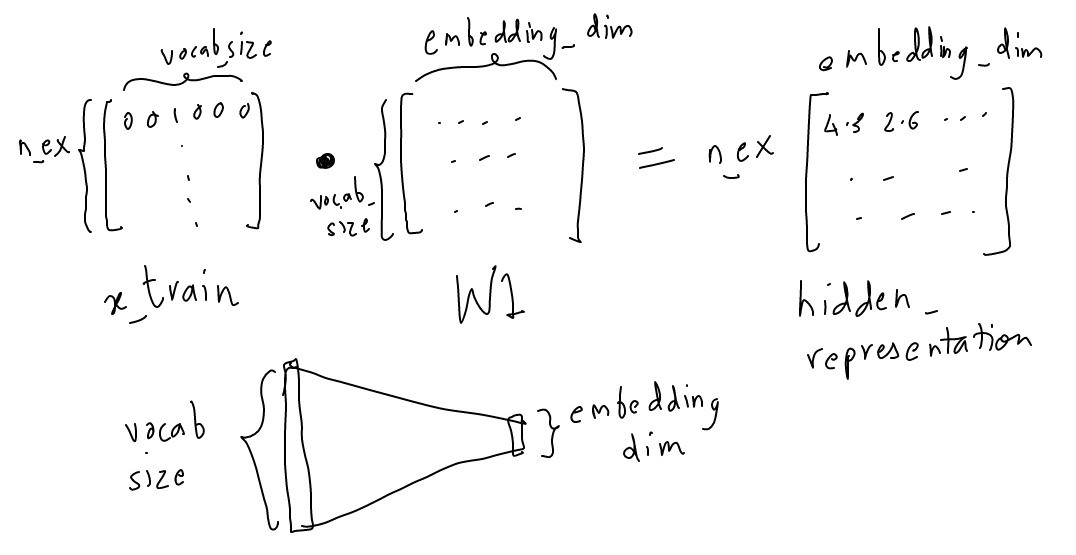

In [58]:
from IPython.display import Image
Image(filename='/home/asabir/Desktop/Embaddig.jpeg')

In [56]:
print y_label

Tensor("Placeholder_2:0", shape=(?, 7), dtype=float32)


In [57]:
print x

Tensor("Placeholder_1:0", shape=(?, 7), dtype=float32)


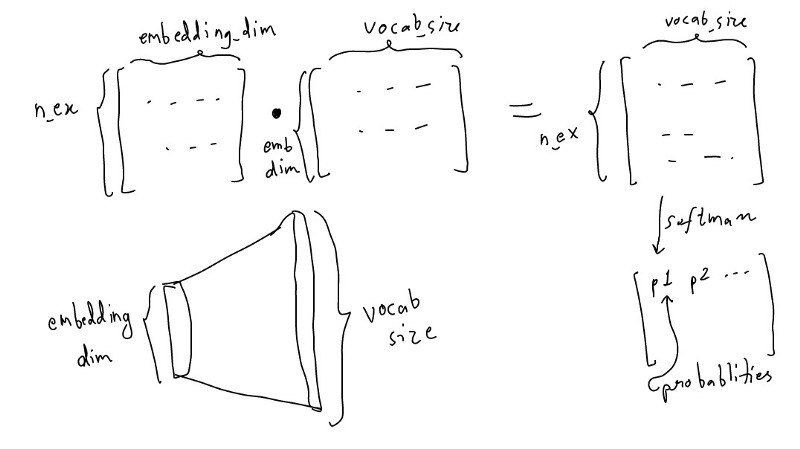

In [63]:
from IPython.display import Image
Image(filename='/home/asabir/Desktop/Embaddig2.jpeg')

In [61]:
# Now we convert it into embadding representation (as figure　↓し)
## you can choose the your own number 
EMBEDDING_DIM = 5 
### W
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
### B 
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))
## Hidden 
hidden_representation = tf.add(tf.matmul(x, W1), b1)

In [82]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))

In [83]:
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

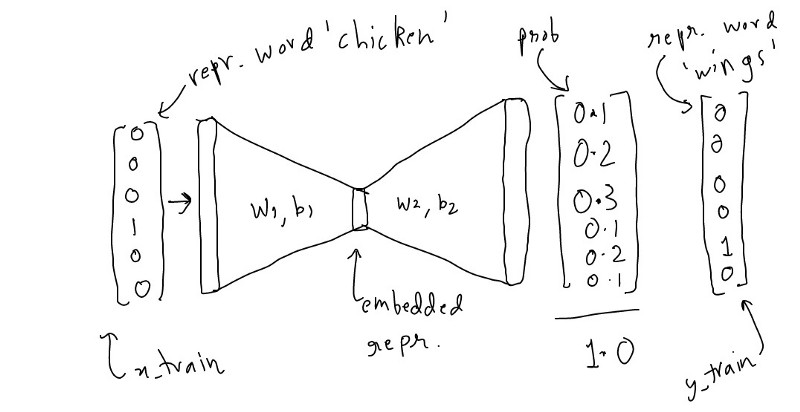

In [65]:
from IPython.display import Image
Image(filename='/home/asabir/Desktop/Embaddig3.jpeg')

In [66]:
## Input_one_hot ---> embedded repr. ----> predicted_neighbour_prob 

In [97]:
# Now, let start the tranining  
sess = tf.Session() 
init = tf.global_variables_initializer()
sess.run(init) 

In [98]:
#define the loss function 
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

In [99]:
#define the tranining stetp 
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

In [100]:
n_iters = 10000

In [101]:
### train for n_iter iterations 
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

('loss is : ', 4.0989766)
('loss is : ', 3.5685561)
('loss is : ', 3.1468568)
('loss is : ', 2.8259022)
('loss is : ', 2.5937517)
('loss is : ', 2.4308743)
('loss is : ', 2.3165433)
('loss is : ', 2.2347524)
('loss is : ', 2.1744661)
('loss is : ', 2.1281395)
('loss is : ', 2.0907216)
('loss is : ', 2.0589898)
('loss is : ', 2.0309789)
('loss is : ', 2.0055213)
('loss is : ', 1.9819262)
('loss is : ', 1.9597794)
('loss is : ', 1.9388257)
('loss is : ', 1.9189012)
('loss is : ', 1.8998957)
('loss is : ', 1.8817307)
('loss is : ', 1.8643473)
('loss is : ', 1.8476987)
('loss is : ', 1.8317459)
('loss is : ', 1.8164552)
('loss is : ', 1.8017974)
('loss is : ', 1.7877446)
('loss is : ', 1.7742712)
('loss is : ', 1.7613539)
('loss is : ', 1.748969)
('loss is : ', 1.7370949)
('loss is : ', 1.7257102)
('loss is : ', 1.7147934)
('loss is : ', 1.7043251)
('loss is : ', 1.6942847)
('loss is : ', 1.6846528)
('loss is : ', 1.6754107)
('loss is : ', 1.6665398)
('loss is : ', 1.658022)
('loss is : ',

('loss is : ', 1.2311287)
('loss is : ', 1.2309629)
('loss is : ', 1.2307979)
('loss is : ', 1.2306341)
('loss is : ', 1.2304711)
('loss is : ', 1.2303091)
('loss is : ', 1.2301481)
('loss is : ', 1.229988)
('loss is : ', 1.2298288)
('loss is : ', 1.2296706)
('loss is : ', 1.2295134)
('loss is : ', 1.2293569)
('loss is : ', 1.2292014)
('loss is : ', 1.2290467)
('loss is : ', 1.228893)
('loss is : ', 1.2287402)
('loss is : ', 1.2285882)
('loss is : ', 1.2284371)
('loss is : ', 1.2282867)
('loss is : ', 1.2281374)
('loss is : ', 1.227989)
('loss is : ', 1.2278413)
('loss is : ', 1.2276944)
('loss is : ', 1.2275482)
('loss is : ', 1.227403)
('loss is : ', 1.2272586)
('loss is : ', 1.2271149)
('loss is : ', 1.2269722)
('loss is : ', 1.22683)
('loss is : ', 1.2266889)
('loss is : ', 1.2265483)
('loss is : ', 1.2264086)
('loss is : ', 1.2262696)
('loss is : ', 1.2261313)
('loss is : ', 1.225994)
('loss is : ', 1.2258574)
('loss is : ', 1.2257212)
('loss is : ', 1.2255861)
('loss is : ', 1.22

('loss is : ', 1.2008967)
('loss is : ', 1.2008673)
('loss is : ', 1.2008377)
('loss is : ', 1.2008084)
('loss is : ', 1.2007788)
('loss is : ', 1.2007498)
('loss is : ', 1.2007207)
('loss is : ', 1.2006917)
('loss is : ', 1.2006625)
('loss is : ', 1.2006338)
('loss is : ', 1.200605)
('loss is : ', 1.2005762)
('loss is : ', 1.2005476)
('loss is : ', 1.200519)
('loss is : ', 1.2004906)
('loss is : ', 1.2004622)
('loss is : ', 1.200434)
('loss is : ', 1.2004057)
('loss is : ', 1.2003776)
('loss is : ', 1.2003496)
('loss is : ', 1.2003217)
('loss is : ', 1.2002938)
('loss is : ', 1.2002661)
('loss is : ', 1.2002383)
('loss is : ', 1.2002107)
('loss is : ', 1.2001832)
('loss is : ', 1.2001556)
('loss is : ', 1.2001283)
('loss is : ', 1.2001009)
('loss is : ', 1.2000738)
('loss is : ', 1.2000468)
('loss is : ', 1.2000197)
('loss is : ', 1.1999927)
('loss is : ', 1.1999658)
('loss is : ', 1.1999391)
('loss is : ', 1.1999123)
('loss is : ', 1.1998857)
('loss is : ', 1.1998591)
('loss is : ', 

('loss is : ', 1.193361)
('loss is : ', 1.193351)
('loss is : ', 1.193341)
('loss is : ', 1.1933309)
('loss is : ', 1.193321)
('loss is : ', 1.1933109)
('loss is : ', 1.1933008)
('loss is : ', 1.1932909)
('loss is : ', 1.1932811)
('loss is : ', 1.1932709)
('loss is : ', 1.1932611)
('loss is : ', 1.1932513)
('loss is : ', 1.1932414)
('loss is : ', 1.1932315)
('loss is : ', 1.1932216)
('loss is : ', 1.1932119)
('loss is : ', 1.1932021)
('loss is : ', 1.1931924)
('loss is : ', 1.1931826)
('loss is : ', 1.1931729)
('loss is : ', 1.1931632)
('loss is : ', 1.1931535)
('loss is : ', 1.1931437)
('loss is : ', 1.1931342)
('loss is : ', 1.1931245)
('loss is : ', 1.1931151)
('loss is : ', 1.1931053)
('loss is : ', 1.1930959)
('loss is : ', 1.1930863)
('loss is : ', 1.1930768)
('loss is : ', 1.1930672)
('loss is : ', 1.1930578)
('loss is : ', 1.1930482)
('loss is : ', 1.1930388)
('loss is : ', 1.1930295)
('loss is : ', 1.19302)
('loss is : ', 1.1930107)
('loss is : ', 1.1930013)
('loss is : ', 1.1

('loss is : ', 1.1905693)
('loss is : ', 1.1905645)
('loss is : ', 1.1905594)
('loss is : ', 1.1905545)
('loss is : ', 1.1905495)
('loss is : ', 1.1905446)
('loss is : ', 1.1905395)
('loss is : ', 1.1905347)
('loss is : ', 1.1905296)
('loss is : ', 1.1905246)
('loss is : ', 1.1905198)
('loss is : ', 1.1905149)
('loss is : ', 1.1905099)
('loss is : ', 1.190505)
('loss is : ', 1.1905001)
('loss is : ', 1.1904953)
('loss is : ', 1.1904902)
('loss is : ', 1.1904855)
('loss is : ', 1.1904806)
('loss is : ', 1.1904757)
('loss is : ', 1.1904709)
('loss is : ', 1.1904662)
('loss is : ', 1.1904612)
('loss is : ', 1.1904564)
('loss is : ', 1.1904516)
('loss is : ', 1.1904467)
('loss is : ', 1.190442)
('loss is : ', 1.1904372)
('loss is : ', 1.1904324)
('loss is : ', 1.1904275)
('loss is : ', 1.1904229)
('loss is : ', 1.190418)
('loss is : ', 1.1904134)
('loss is : ', 1.1904085)
('loss is : ', 1.1904037)
('loss is : ', 1.1903991)
('loss is : ', 1.1903943)
('loss is : ', 1.1903895)
('loss is : ', 

('loss is : ', 1.1890764)
('loss is : ', 1.1890737)
('loss is : ', 1.1890707)
('loss is : ', 1.189068)
('loss is : ', 1.189065)
('loss is : ', 1.1890622)
('loss is : ', 1.1890593)
('loss is : ', 1.1890564)
('loss is : ', 1.1890535)
('loss is : ', 1.1890506)
('loss is : ', 1.1890478)
('loss is : ', 1.1890451)
('loss is : ', 1.1890421)
('loss is : ', 1.1890393)
('loss is : ', 1.1890364)
('loss is : ', 1.1890336)
('loss is : ', 1.1890308)
('loss is : ', 1.189028)
('loss is : ', 1.1890252)
('loss is : ', 1.1890225)
('loss is : ', 1.1890196)
('loss is : ', 1.1890167)
('loss is : ', 1.1890138)
('loss is : ', 1.1890111)
('loss is : ', 1.1890082)
('loss is : ', 1.1890054)
('loss is : ', 1.1890028)
('loss is : ', 1.1889999)
('loss is : ', 1.1889971)
('loss is : ', 1.1889944)
('loss is : ', 1.1889915)
('loss is : ', 1.1889887)
('loss is : ', 1.1889861)
('loss is : ', 1.1889832)
('loss is : ', 1.1889806)
('loss is : ', 1.1889777)
('loss is : ', 1.1889749)
('loss is : ', 1.1889722)
('loss is : ', 

('loss is : ', 1.1881437)
('loss is : ', 1.1881418)
('loss is : ', 1.1881399)
('loss is : ', 1.1881381)
('loss is : ', 1.1881363)
('loss is : ', 1.1881346)
('loss is : ', 1.1881326)
('loss is : ', 1.188131)
('loss is : ', 1.1881292)
('loss is : ', 1.1881273)
('loss is : ', 1.1881256)
('loss is : ', 1.1881238)
('loss is : ', 1.1881219)
('loss is : ', 1.1881201)
('loss is : ', 1.1881182)
('loss is : ', 1.1881166)
('loss is : ', 1.1881148)
('loss is : ', 1.1881131)
('loss is : ', 1.1881112)
('loss is : ', 1.1881094)
('loss is : ', 1.1881076)
('loss is : ', 1.1881058)
('loss is : ', 1.1881042)
('loss is : ', 1.1881022)
('loss is : ', 1.1881005)
('loss is : ', 1.1880988)
('loss is : ', 1.1880971)
('loss is : ', 1.1880953)
('loss is : ', 1.1880935)
('loss is : ', 1.1880918)
('loss is : ', 1.18809)
('loss is : ', 1.1880882)
('loss is : ', 1.1880865)
('loss is : ', 1.1880846)
('loss is : ', 1.1880829)
('loss is : ', 1.1880811)
('loss is : ', 1.1880794)
('loss is : ', 1.1880776)
('loss is : ', 

('loss is : ', 1.1875554)
('loss is : ', 1.187554)
('loss is : ', 1.1875527)
('loss is : ', 1.1875516)
('loss is : ', 1.1875503)
('loss is : ', 1.187549)
('loss is : ', 1.1875479)
('loss is : ', 1.1875465)
('loss is : ', 1.1875453)
('loss is : ', 1.1875441)
('loss is : ', 1.1875428)
('loss is : ', 1.1875417)
('loss is : ', 1.1875404)
('loss is : ', 1.1875391)
('loss is : ', 1.187538)
('loss is : ', 1.1875366)
('loss is : ', 1.1875354)
('loss is : ', 1.1875342)
('loss is : ', 1.187533)
('loss is : ', 1.1875318)
('loss is : ', 1.1875305)
('loss is : ', 1.1875294)
('loss is : ', 1.187528)
('loss is : ', 1.1875268)
('loss is : ', 1.1875257)
('loss is : ', 1.1875244)
('loss is : ', 1.1875231)
('loss is : ', 1.1875219)
('loss is : ', 1.1875206)
('loss is : ', 1.1875196)
('loss is : ', 1.1875184)
('loss is : ', 1.1875169)
('loss is : ', 1.187516)
('loss is : ', 1.1875147)
('loss is : ', 1.1875136)
('loss is : ', 1.1875123)
('loss is : ', 1.187511)
('loss is : ', 1.1875099)
('loss is : ', 1.18

('loss is : ', 1.1871152)
('loss is : ', 1.1871142)
('loss is : ', 1.1871134)
('loss is : ', 1.1871126)
('loss is : ', 1.1871116)
('loss is : ', 1.1871107)
('loss is : ', 1.1871099)
('loss is : ', 1.1871089)
('loss is : ', 1.187108)
('loss is : ', 1.1871072)
('loss is : ', 1.1871064)
('loss is : ', 1.1871054)
('loss is : ', 1.1871046)
('loss is : ', 1.1871037)
('loss is : ', 1.1871028)
('loss is : ', 1.187102)
('loss is : ', 1.187101)
('loss is : ', 1.1871002)
('loss is : ', 1.1870993)
('loss is : ', 1.1870985)
('loss is : ', 1.1870974)
('loss is : ', 1.1870966)
('loss is : ', 1.1870958)
('loss is : ', 1.1870949)
('loss is : ', 1.1870941)
('loss is : ', 1.1870931)
('loss is : ', 1.1870923)
('loss is : ', 1.1870914)
('loss is : ', 1.1870905)
('loss is : ', 1.1870897)
('loss is : ', 1.1870888)
('loss is : ', 1.1870879)
('loss is : ', 1.1870871)
('loss is : ', 1.187086)
('loss is : ', 1.1870853)
('loss is : ', 1.1870844)
('loss is : ', 1.1870835)
('loss is : ', 1.1870828)
('loss is : ', 1

('loss is : ', 1.1867967)
('loss is : ', 1.1867959)
('loss is : ', 1.1867952)
('loss is : ', 1.1867948)
('loss is : ', 1.186794)
('loss is : ', 1.1867933)
('loss is : ', 1.1867926)
('loss is : ', 1.186792)
('loss is : ', 1.1867913)
('loss is : ', 1.1867906)
('loss is : ', 1.18679)
('loss is : ', 1.1867895)
('loss is : ', 1.1867888)
('loss is : ', 1.186788)
('loss is : ', 1.1867875)
('loss is : ', 1.1867868)
('loss is : ', 1.1867861)
('loss is : ', 1.1867856)
('loss is : ', 1.1867849)
('loss is : ', 1.1867841)
('loss is : ', 1.1867836)
('loss is : ', 1.1867828)
('loss is : ', 1.1867821)
('loss is : ', 1.1867815)
('loss is : ', 1.1867808)
('loss is : ', 1.1867801)
('loss is : ', 1.1867796)
('loss is : ', 1.1867789)
('loss is : ', 1.1867783)
('loss is : ', 1.1867777)
('loss is : ', 1.1867769)
('loss is : ', 1.1867765)
('loss is : ', 1.1867757)
('loss is : ', 1.186775)
('loss is : ', 1.1867745)
('loss is : ', 1.1867738)
('loss is : ', 1.1867731)
('loss is : ', 1.1867725)
('loss is : ', 1.1

('loss is : ', 1.1865571)
('loss is : ', 1.1865565)
('loss is : ', 1.1865561)
('loss is : ', 1.1865555)
('loss is : ', 1.1865549)
('loss is : ', 1.1865546)
('loss is : ', 1.186554)
('loss is : ', 1.1865537)
('loss is : ', 1.186553)
('loss is : ', 1.1865525)
('loss is : ', 1.1865518)
('loss is : ', 1.1865515)
('loss is : ', 1.186551)
('loss is : ', 1.1865506)
('loss is : ', 1.1865499)
('loss is : ', 1.1865494)
('loss is : ', 1.1865488)
('loss is : ', 1.1865485)
('loss is : ', 1.1865479)
('loss is : ', 1.1865473)
('loss is : ', 1.1865469)
('loss is : ', 1.1865464)
('loss is : ', 1.1865458)
('loss is : ', 1.1865454)
('loss is : ', 1.1865449)
('loss is : ', 1.1865443)
('loss is : ', 1.1865439)
('loss is : ', 1.1865433)
('loss is : ', 1.1865427)
('loss is : ', 1.1865424)
('loss is : ', 1.1865418)
('loss is : ', 1.1865414)
('loss is : ', 1.1865408)
('loss is : ', 1.1865404)
('loss is : ', 1.1865398)
('loss is : ', 1.1865394)
('loss is : ', 1.1865388)
('loss is : ', 1.1865385)
('loss is : ', 

('loss is : ', 1.1863676)
('loss is : ', 1.1863673)
('loss is : ', 1.1863669)
('loss is : ', 1.1863664)
('loss is : ', 1.1863661)
('loss is : ', 1.1863656)
('loss is : ', 1.1863654)
('loss is : ', 1.1863648)
('loss is : ', 1.1863643)
('loss is : ', 1.1863641)
('loss is : ', 1.1863637)
('loss is : ', 1.1863633)
('loss is : ', 1.186363)
('loss is : ', 1.1863624)
('loss is : ', 1.1863621)
('loss is : ', 1.1863617)
('loss is : ', 1.1863612)
('loss is : ', 1.1863608)
('loss is : ', 1.1863604)
('loss is : ', 1.18636)
('loss is : ', 1.1863599)
('loss is : ', 1.1863593)
('loss is : ', 1.1863589)
('loss is : ', 1.1863585)
('loss is : ', 1.186358)
('loss is : ', 1.1863577)
('loss is : ', 1.1863573)
('loss is : ', 1.186357)
('loss is : ', 1.1863564)
('loss is : ', 1.1863561)
('loss is : ', 1.1863557)
('loss is : ', 1.1863554)
('loss is : ', 1.1863549)
('loss is : ', 1.1863545)
('loss is : ', 1.1863542)
('loss is : ', 1.1863538)
('loss is : ', 1.1863533)
('loss is : ', 1.1863528)
('loss is : ', 1.

('loss is : ', 1.186217)
('loss is : ', 1.1862167)
('loss is : ', 1.1862162)
('loss is : ', 1.186216)
('loss is : ', 1.1862158)
('loss is : ', 1.1862154)
('loss is : ', 1.1862152)
('loss is : ', 1.1862147)
('loss is : ', 1.1862144)
('loss is : ', 1.186214)
('loss is : ', 1.1862137)
('loss is : ', 1.1862135)
('loss is : ', 1.186213)
('loss is : ', 1.1862128)
('loss is : ', 1.1862124)
('loss is : ', 1.1862121)
('loss is : ', 1.1862117)
('loss is : ', 1.1862115)
('loss is : ', 1.1862112)
('loss is : ', 1.1862109)
('loss is : ', 1.1862105)
('loss is : ', 1.18621)
('loss is : ', 1.1862098)
('loss is : ', 1.1862096)
('loss is : ', 1.1862092)
('loss is : ', 1.186209)
('loss is : ', 1.1862085)
('loss is : ', 1.1862082)
('loss is : ', 1.1862078)
('loss is : ', 1.1862075)
('loss is : ', 1.1862073)
('loss is : ', 1.1862069)
('loss is : ', 1.1862067)
('loss is : ', 1.1862063)
('loss is : ', 1.186206)
('loss is : ', 1.1862057)
('loss is : ', 1.1862053)
('loss is : ', 1.186205)
('loss is : ', 1.1862

('loss is : ', 1.1861013)
('loss is : ', 1.186101)
('loss is : ', 1.1861007)
('loss is : ', 1.1861005)
('loss is : ', 1.1861001)
('loss is : ', 1.1860999)
('loss is : ', 1.1860995)
('loss is : ', 1.1860993)
('loss is : ', 1.1860991)
('loss is : ', 1.1860987)
('loss is : ', 1.1860985)
('loss is : ', 1.1860982)
('loss is : ', 1.186098)
('loss is : ', 1.1860977)
('loss is : ', 1.1860973)
('loss is : ', 1.1860971)
('loss is : ', 1.1860969)
('loss is : ', 1.1860967)
('loss is : ', 1.1860963)
('loss is : ', 1.1860962)
('loss is : ', 1.1860957)
('loss is : ', 1.1860956)
('loss is : ', 1.1860954)
('loss is : ', 1.1860949)
('loss is : ', 1.1860946)
('loss is : ', 1.1860945)
('loss is : ', 1.1860942)
('loss is : ', 1.1860938)
('loss is : ', 1.1860937)
('loss is : ', 1.1860933)
('loss is : ', 1.1860931)
('loss is : ', 1.1860929)
('loss is : ', 1.1860925)
('loss is : ', 1.1860923)
('loss is : ', 1.1860919)
('loss is : ', 1.1860917)
('loss is : ', 1.1860914)
('loss is : ', 1.1860913)
('loss is : ',

('loss is : ', 1.1860021)
('loss is : ', 1.1860019)
('loss is : ', 1.1860017)
('loss is : ', 1.1860014)
('loss is : ', 1.1860013)
('loss is : ', 1.1860009)
('loss is : ', 1.1860007)
('loss is : ', 1.1860006)
('loss is : ', 1.1860002)
('loss is : ', 1.1860001)
('loss is : ', 1.1859999)
('loss is : ', 1.1859998)
('loss is : ', 1.1859994)
('loss is : ', 1.1859992)
('loss is : ', 1.185999)
('loss is : ', 1.1859987)
('loss is : ', 1.1859984)
('loss is : ', 1.1859981)
('loss is : ', 1.185998)
('loss is : ', 1.1859978)
('loss is : ', 1.1859976)
('loss is : ', 1.1859975)
('loss is : ', 1.1859971)
('loss is : ', 1.1859969)
('loss is : ', 1.1859965)
('loss is : ', 1.1859964)
('loss is : ', 1.1859962)
('loss is : ', 1.1859959)
('loss is : ', 1.1859956)
('loss is : ', 1.1859955)
('loss is : ', 1.1859953)
('loss is : ', 1.185995)
('loss is : ', 1.1859949)
('loss is : ', 1.1859945)
('loss is : ', 1.1859945)
('loss is : ', 1.1859941)
('loss is : ', 1.1859939)
('loss is : ', 1.1859938)
('loss is : ', 

('loss is : ', 1.18592)
('loss is : ', 1.1859199)
('loss is : ', 1.1859196)
('loss is : ', 1.1859194)
('loss is : ', 1.1859193)
('loss is : ', 1.185919)
('loss is : ', 1.1859189)
('loss is : ', 1.1859187)
('loss is : ', 1.1859185)
('loss is : ', 1.1859182)
('loss is : ', 1.185918)
('loss is : ', 1.1859177)
('loss is : ', 1.1859176)
('loss is : ', 1.1859175)
('loss is : ', 1.1859174)
('loss is : ', 1.185917)
('loss is : ', 1.1859168)
('loss is : ', 1.1859168)
('loss is : ', 1.1859164)
('loss is : ', 1.1859163)
('loss is : ', 1.1859161)
('loss is : ', 1.1859159)
('loss is : ', 1.1859158)
('loss is : ', 1.1859155)
('loss is : ', 1.1859154)
('loss is : ', 1.1859152)
('loss is : ', 1.1859149)
('loss is : ', 1.1859148)
('loss is : ', 1.1859145)
('loss is : ', 1.1859144)
('loss is : ', 1.1859142)
('loss is : ', 1.1859139)
('loss is : ', 1.1859138)
('loss is : ', 1.1859137)
('loss is : ', 1.1859133)
('loss is : ', 1.1859132)
('loss is : ', 1.1859131)
('loss is : ', 1.1859128)
('loss is : ', 1.

('loss is : ', 1.1858475)
('loss is : ', 1.1858474)
('loss is : ', 1.1858472)
('loss is : ', 1.1858469)
('loss is : ', 1.1858468)
('loss is : ', 1.1858466)
('loss is : ', 1.1858464)
('loss is : ', 1.1858462)
('loss is : ', 1.185846)
('loss is : ', 1.1858459)
('loss is : ', 1.1858457)
('loss is : ', 1.1858455)
('loss is : ', 1.1858454)
('loss is : ', 1.1858453)
('loss is : ', 1.185845)
('loss is : ', 1.1858449)
('loss is : ', 1.1858447)
('loss is : ', 1.1858445)
('loss is : ', 1.1858444)
('loss is : ', 1.1858443)
('loss is : ', 1.1858442)
('loss is : ', 1.1858438)
('loss is : ', 1.1858437)
('loss is : ', 1.1858436)
('loss is : ', 1.1858433)
('loss is : ', 1.1858431)
('loss is : ', 1.185843)
('loss is : ', 1.1858429)
('loss is : ', 1.1858428)
('loss is : ', 1.1858426)
('loss is : ', 1.1858424)
('loss is : ', 1.1858422)
('loss is : ', 1.1858422)
('loss is : ', 1.1858419)
('loss is : ', 1.1858417)
('loss is : ', 1.1858416)
('loss is : ', 1.1858413)
('loss is : ', 1.1858412)
('loss is : ', 

('loss is : ', 1.1857806)
('loss is : ', 1.1857806)
('loss is : ', 1.1857804)
('loss is : ', 1.1857803)
('loss is : ', 1.1857802)
('loss is : ', 1.18578)
('loss is : ', 1.1857798)
('loss is : ', 1.1857797)
('loss is : ', 1.1857796)
('loss is : ', 1.1857795)
('loss is : ', 1.1857793)
('loss is : ', 1.1857791)
('loss is : ', 1.1857791)
('loss is : ', 1.1857789)
('loss is : ', 1.1857787)
('loss is : ', 1.1857786)
('loss is : ', 1.1857785)
('loss is : ', 1.1857783)
('loss is : ', 1.1857781)
('loss is : ', 1.185778)
('loss is : ', 1.1857778)
('loss is : ', 1.1857775)
('loss is : ', 1.1857775)
('loss is : ', 1.1857773)
('loss is : ', 1.1857773)
('loss is : ', 1.1857772)
('loss is : ', 1.1857768)
('loss is : ', 1.1857768)
('loss is : ', 1.1857766)
('loss is : ', 1.1857766)
('loss is : ', 1.1857764)
('loss is : ', 1.1857762)
('loss is : ', 1.1857762)
('loss is : ', 1.1857759)
('loss is : ', 1.1857758)
('loss is : ', 1.1857756)
('loss is : ', 1.1857756)
('loss is : ', 1.1857755)
('loss is : ', 

('loss is : ', 1.1857231)
('loss is : ', 1.1857229)
('loss is : ', 1.1857228)
('loss is : ', 1.1857228)
('loss is : ', 1.1857226)
('loss is : ', 1.1857224)
('loss is : ', 1.1857224)
('loss is : ', 1.1857222)
('loss is : ', 1.1857221)
('loss is : ', 1.1857219)
('loss is : ', 1.1857218)
('loss is : ', 1.1857216)
('loss is : ', 1.1857215)
('loss is : ', 1.1857215)
('loss is : ', 1.1857213)
('loss is : ', 1.1857213)
('loss is : ', 1.1857209)
('loss is : ', 1.1857208)
('loss is : ', 1.1857207)
('loss is : ', 1.1857207)
('loss is : ', 1.1857206)
('loss is : ', 1.1857206)
('loss is : ', 1.1857202)
('loss is : ', 1.1857201)
('loss is : ', 1.1857201)
('loss is : ', 1.18572)
('loss is : ', 1.1857198)
('loss is : ', 1.1857196)
('loss is : ', 1.1857195)
('loss is : ', 1.1857194)
('loss is : ', 1.1857193)
('loss is : ', 1.1857191)
('loss is : ', 1.185719)
('loss is : ', 1.185719)
('loss is : ', 1.1857187)
('loss is : ', 1.1857187)
('loss is : ', 1.1857184)
('loss is : ', 1.1857183)
('loss is : ', 1

('loss is : ', 1.1856729)
('loss is : ', 1.1856728)
('loss is : ', 1.1856728)
('loss is : ', 1.1856726)
('loss is : ', 1.1856725)
('loss is : ', 1.1856725)
('loss is : ', 1.1856723)
('loss is : ', 1.1856722)
('loss is : ', 1.185672)
('loss is : ', 1.1856719)
('loss is : ', 1.1856718)
('loss is : ', 1.1856718)
('loss is : ', 1.1856717)
('loss is : ', 1.1856717)
('loss is : ', 1.1856713)
('loss is : ', 1.1856712)
('loss is : ', 1.1856713)
('loss is : ', 1.1856711)
('loss is : ', 1.185671)
('loss is : ', 1.185671)
('loss is : ', 1.1856707)
('loss is : ', 1.1856706)
('loss is : ', 1.1856705)
('loss is : ', 1.1856704)
('loss is : ', 1.1856703)
('loss is : ', 1.1856703)
('loss is : ', 1.18567)
('loss is : ', 1.1856699)
('loss is : ', 1.1856698)
('loss is : ', 1.1856698)
('loss is : ', 1.1856697)
('loss is : ', 1.1856695)
('loss is : ', 1.1856694)
('loss is : ', 1.1856692)
('loss is : ', 1.1856692)
('loss is : ', 1.1856689)
('loss is : ', 1.1856689)
('loss is : ', 1.1856689)
('loss is : ', 1.

('loss is : ', 1.1856284)
('loss is : ', 1.1856283)
('loss is : ', 1.1856283)
('loss is : ', 1.1856281)
('loss is : ', 1.1856279)
('loss is : ', 1.1856279)
('loss is : ', 1.1856278)
('loss is : ', 1.1856277)
('loss is : ', 1.1856276)
('loss is : ', 1.1856276)
('loss is : ', 1.1856275)
('loss is : ', 1.1856272)
('loss is : ', 1.1856272)
('loss is : ', 1.1856271)
('loss is : ', 1.185627)
('loss is : ', 1.185627)
('loss is : ', 1.1856269)
('loss is : ', 1.1856267)
('loss is : ', 1.1856265)
('loss is : ', 1.1856265)
('loss is : ', 1.1856265)
('loss is : ', 1.1856263)
('loss is : ', 1.1856263)
('loss is : ', 1.1856261)
('loss is : ', 1.185626)
('loss is : ', 1.1856259)
('loss is : ', 1.185626)
('loss is : ', 1.1856257)
('loss is : ', 1.1856257)
('loss is : ', 1.1856257)
('loss is : ', 1.1856254)
('loss is : ', 1.1856253)
('loss is : ', 1.1856253)
('loss is : ', 1.1856253)
('loss is : ', 1.1856252)
('loss is : ', 1.185625)
('loss is : ', 1.1856248)
('loss is : ', 1.1856248)
('loss is : ', 1.

('loss is : ', 1.1855918)
('loss is : ', 1.1855917)
('loss is : ', 1.1855916)
('loss is : ', 1.1855916)
('loss is : ', 1.1855916)
('loss is : ', 1.1855912)
('loss is : ', 1.1855912)
('loss is : ', 1.1855911)
('loss is : ', 1.185591)
('loss is : ', 1.185591)
('loss is : ', 1.185591)
('loss is : ', 1.1855909)
('loss is : ', 1.1855906)
('loss is : ', 1.1855906)
('loss is : ', 1.1855904)
('loss is : ', 1.1855904)
('loss is : ', 1.1855903)
('loss is : ', 1.1855904)
('loss is : ', 1.1855901)
('loss is : ', 1.1855901)
('loss is : ', 1.1855899)
('loss is : ', 1.1855899)
('loss is : ', 1.1855898)
('loss is : ', 1.1855897)
('loss is : ', 1.1855897)
('loss is : ', 1.1855896)
('loss is : ', 1.1855894)
('loss is : ', 1.1855894)
('loss is : ', 1.1855893)
('loss is : ', 1.1855893)
('loss is : ', 1.1855891)
('loss is : ', 1.185589)
('loss is : ', 1.185589)
('loss is : ', 1.185589)
('loss is : ', 1.1855888)
('loss is : ', 1.1855886)
('loss is : ', 1.1855886)
('loss is : ', 1.1855884)
('loss is : ', 1.1

('loss is : ', 1.1855572)
('loss is : ', 1.1855572)
('loss is : ', 1.1855572)
('loss is : ', 1.185557)
('loss is : ', 1.1855569)
('loss is : ', 1.185557)
('loss is : ', 1.1855568)
('loss is : ', 1.1855568)
('loss is : ', 1.1855567)
('loss is : ', 1.1855565)
('loss is : ', 1.1855565)
('loss is : ', 1.1855565)
('loss is : ', 1.1855563)
('loss is : ', 1.1855562)
('loss is : ', 1.1855561)
('loss is : ', 1.1855561)
('loss is : ', 1.1855559)
('loss is : ', 1.1855561)
('loss is : ', 1.1855558)
('loss is : ', 1.1855558)
('loss is : ', 1.1855558)
('loss is : ', 1.1855555)
('loss is : ', 1.1855555)
('loss is : ', 1.1855555)
('loss is : ', 1.1855553)
('loss is : ', 1.1855552)
('loss is : ', 1.1855552)
('loss is : ', 1.1855552)
('loss is : ', 1.1855551)
('loss is : ', 1.185555)
('loss is : ', 1.185555)
('loss is : ', 1.1855547)
('loss is : ', 1.1855547)
('loss is : ', 1.1855546)
('loss is : ', 1.1855545)
('loss is : ', 1.1855545)
('loss is : ', 1.1855545)
('loss is : ', 1.1855544)
('loss is : ', 1

('loss is : ', 1.185526)
('loss is : ', 1.185526)
('loss is : ', 1.1855258)
('loss is : ', 1.1855257)
('loss is : ', 1.1855258)
('loss is : ', 1.1855255)
('loss is : ', 1.1855255)
('loss is : ', 1.1855254)
('loss is : ', 1.1855254)
('loss is : ', 1.1855254)
('loss is : ', 1.1855253)
('loss is : ', 1.1855251)
('loss is : ', 1.1855251)
('loss is : ', 1.1855249)
('loss is : ', 1.1855251)
('loss is : ', 1.1855248)
('loss is : ', 1.1855247)
('loss is : ', 1.1855248)
('loss is : ', 1.1855247)
('loss is : ', 1.1855247)
('loss is : ', 1.1855246)
('loss is : ', 1.1855245)
('loss is : ', 1.1855245)
('loss is : ', 1.1855245)
('loss is : ', 1.1855242)
('loss is : ', 1.1855241)
('loss is : ', 1.1855241)
('loss is : ', 1.185524)
('loss is : ', 1.185524)
('loss is : ', 1.1855239)
('loss is : ', 1.1855239)
('loss is : ', 1.1855239)
('loss is : ', 1.1855237)
('loss is : ', 1.1855237)
('loss is : ', 1.1855235)
('loss is : ', 1.1855235)
('loss is : ', 1.1855233)
('loss is : ', 1.1855233)
('loss is : ', 1

('loss is : ', 1.185497)
('loss is : ', 1.185497)
('loss is : ', 1.1854968)
('loss is : ', 1.1854968)
('loss is : ', 1.1854967)
('loss is : ', 1.1854966)
('loss is : ', 1.1854967)
('loss is : ', 1.1854966)
('loss is : ', 1.1854964)
('loss is : ', 1.1854964)
('loss is : ', 1.1854964)
('loss is : ', 1.1854963)
('loss is : ', 1.1854963)
('loss is : ', 1.1854963)
('loss is : ', 1.1854962)
('loss is : ', 1.1854962)
('loss is : ', 1.185496)
('loss is : ', 1.185496)
('loss is : ', 1.1854959)
('loss is : ', 1.1854959)
('loss is : ', 1.1854957)
('loss is : ', 1.1854957)
('loss is : ', 1.1854957)
('loss is : ', 1.1854955)
('loss is : ', 1.1854955)
('loss is : ', 1.1854955)
('loss is : ', 1.1854953)
('loss is : ', 1.1854953)
('loss is : ', 1.1854951)
('loss is : ', 1.1854951)
('loss is : ', 1.1854951)
('loss is : ', 1.185495)
('loss is : ', 1.185495)
('loss is : ', 1.1854949)
('loss is : ', 1.1854949)
('loss is : ', 1.1854948)
('loss is : ', 1.1854948)
('loss is : ', 1.1854945)
('loss is : ', 1.1

In [102]:
Vectors = sess.run(W1+b1)

In [105]:
print (sess.run(W1))
print('----------')

[[ 0.26158258  0.19832245 -0.6099636  -1.7137903   0.83635795]
 [-0.72114849 -0.24571961 -0.18291068 -0.05838389 -1.03268492]
 [-0.83838588  2.54071689  0.73579419 -0.65355003  3.41456938]
 [-0.77089083 -1.63382721  1.5979774   1.03004158  3.50342298]
 [-2.04447699 -1.2410965  -0.89785439  0.01826145  0.60431951]
 [-0.27359089  2.5200038   1.40349293  1.64288473  0.13904169]
 [ 0.76174158  0.53495288 -1.37612534 -1.05561113 -0.51457983]]
----------


In [106]:
print(sess.run(b1))
print('----------')

[ 0.19130173  0.74324054 -1.03696299 -1.84479702 -0.09002465]
----------


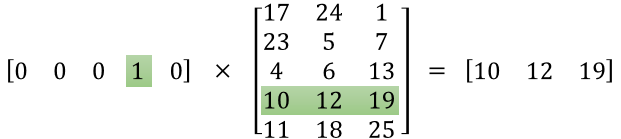

In [108]:
### one-hot-vectors 
from IPython.display import Image
Image(filename='/home/asabir/Desktop/hot_v.png')

In [110]:
#Multiply the one hot vector with W1, we basically get access to the raw of W1 which is in the fact ..
# the embedded representation of the word represented by the input ONE-HOT-VECTOR. So W1 is essentially acting
# as a look up-table 
vectors = sess.run(W1+b1)
# if you work it out, you will see that it has the same effect as running the node hidden representation
print vectors

[[ 0.45288432  0.94156301 -1.64692664 -3.55858731  0.7463333 ]
 [-0.52984679  0.49752092 -1.21987367 -1.90318096 -1.12270951]
 [-0.64708412  3.28395748 -0.3011688  -2.49834704  3.32454467]
 [-0.57958913 -0.89058667  0.56101441 -0.81475544  3.41339827]
 [-1.85317528 -0.49785596 -1.93481731 -1.82653558  0.51429486]
 [-0.08228916  3.26324439  0.36652994 -0.20191228  0.04901704]
 [ 0.95304334  1.27819347 -2.41308832 -2.90040827 -0.60460448]]


In [113]:
# So, if we want the representation for 'queen; for example 
# say here word2int['queen'] is 2 
print(vectors[ word2int['queen']])

[-0.57958913 -0.89058667  0.56101441 -0.81475544  3.41339827]


In [116]:
### Now we have our Vectors 
## To find the closest vector to a given vector 
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2)) 

In [120]:
def find_closest(word_index, vectors):
    # act loke positive infinity 
    min_dist = 1000 
    min_index = -1 
    
    query_vector = vectors[word_index]
    
    for index, vector in enumerate (vectors):
        if euclidean_dist(vector, query_vector)< min_dist and not np.array_equal(vector, query_vector):
            
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
            
    return min_index

In [166]:
### NOW lets check out query of two vectors 'king' and 'royal"
print (int2word[find_closest(word2int['king'], vectors)])
print (int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

he
royal
she


In [128]:
# our embadding learnt that 
# King is closest to he 
# queen is closest to royal 
# royal is closest to she 
#### BIGGER Corpus will lead to better results### 
### As well note that the random initialization of the weight 

In [167]:
### lets reduce the the demension from 5 to 2 with our dimensionality reduction technique: tSNE
import sklearn 
from sklearn.manifold import TSNE

model = TSNE(n_components =2, random_state= 0)
np.set_printoptions(supress=True)
vector =model.fit_transform(vectors)

ImportError: No module named sklearn

In [168]:
##  we need to normalize the result, so that we can view them plot them
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

ImportError: No module named sklearn

('king', 0.94156301)


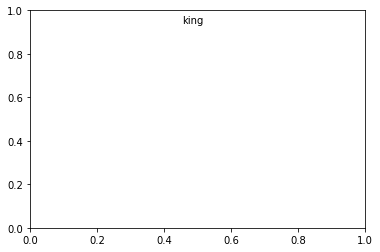

('she', 0.49752092)
('is', 3.2839575)
('queen', -0.89058667)
('royal', -0.49785596)
('the', 3.2632444)
('he', 1.2781935)


In [182]:
### plot the 2D normalized vectors 
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()

for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0], vectors[word2int[word]][1])) 
    plt.show() 